## Observations and Insights 

In [21]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
from scipy.stats import sem
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
combined_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumour Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [3]:
# Checking the number of mice.
mice_count = len(combined_data["Mouse ID"].unique())
mice_count

249

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicate_mice_df = combined_data.duplicated(subset=["Mouse ID", "Timepoint"])
duplicate_mice_df 

#add the data to original dataframe
combined_data["Duplicated Mouse ID & Timepoint"] = duplicate_mice_df 
combined_data

#filter that column for 'True' to identify duplicate data for mice
duplicate_mice_df = combined_data.loc[combined_data["Duplicated Mouse ID & Timepoint"] == True]
duplicate_mice_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumour Volume (mm3),Metastatic Sites,Duplicated Mouse ID & Timepoint
909,g989,Propriva,Female,21,26,0,45.000000,0,True
911,g989,Propriva,Female,21,26,5,47.570392,0,True
913,g989,Propriva,Female,21,26,10,49.880528,0,True
915,g989,Propriva,Female,21,26,15,53.442020,0,True
917,g989,Propriva,Female,21,26,20,54.657650,1,True


In [5]:
# Optional: Get all the data for the duplicate mouse ID. 

mice_df_g989 = combined_data.loc[combined_data["Mouse ID"] == "g989"]
mice_df_g989

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumour Volume (mm3),Metastatic Sites,Duplicated Mouse ID & Timepoint
908,g989,Propriva,Female,21,26,0,45.000000,0,False
909,g989,Propriva,Female,21,26,0,45.000000,0,True
910,g989,Propriva,Female,21,26,5,48.786801,0,False
911,g989,Propriva,Female,21,26,5,47.570392,0,True
912,g989,Propriva,Female,21,26,10,51.745156,0,False
913,g989,Propriva,Female,21,26,10,49.880528,0,True
914,g989,Propriva,Female,21,26,15,51.325852,1,False
915,g989,Propriva,Female,21,26,15,53.442020,0,True
916,g989,Propriva,Female,21,26,20,55.326122,1,False
917,g989,Propriva,Female,21,26,20,54.657650,1,True


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

combined_data = combined_data[combined_data["Mouse ID"] != "g989"]
combined_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumour Volume (mm3),Metastatic Sites,Duplicated Mouse ID & Timepoint
0,k403,Ramicane,Male,21,16,0,45.000000,0,False
1,k403,Ramicane,Male,21,16,5,38.825898,0,False
2,k403,Ramicane,Male,21,16,10,35.014271,1,False
3,k403,Ramicane,Male,21,16,15,34.223992,1,False
4,k403,Ramicane,Male,21,16,20,32.997729,1,False
...,...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2,False
1889,z969,Naftisol,Male,9,30,30,65.841013,3,False
1890,z969,Naftisol,Male,9,30,35,69.176246,4,False
1891,z969,Naftisol,Male,9,30,40,70.314904,4,False


In [7]:
# Checking the number of mice in the clean DataFrame.

mice_count_after_removal = len(combined_data["Mouse ID"].unique())
mice_count_after_removal


248

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumour volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 

# mean, median, variance, standard deviation, and SEM of the tumour volume. 

#mean turnover volume including dataframe
mean_turnover_volume = combined_data.groupby("Drug Regimen")["Tumour Volume (mm3)"].mean()
mean_df = pd.DataFrame({"Drug Regimen": mean_turnover_volume.index,
                        "Tumour Volume (mm3) Mean": mean_turnover_volume.values}) 

#median turnover volume including dataframe
median_turnover_volume = combined_data.groupby("Drug Regimen")["Tumour Volume (mm3)"].median()
med_df = pd.DataFrame({"Drug Regimen": median_turnover_volume.index,
                       "Tumour Volume (mm3) Median": median_turnover_volume.values}) 

#variable turnover volume including dataframe
variable_turnover_volume = combined_data.groupby("Drug Regimen")["Tumour Volume (mm3)"].var()
var_df = pd.DataFrame({"Drug Regimen": variable_turnover_volume.index,
                       "Tumour Volume (mm3) Mode": variable_turnover_volume.values}) 

#standard deviation turnover volume including dataframe
std_turnover_volume = combined_data.groupby("Drug Regimen")["Tumour Volume (mm3)"].std()
std_df = pd.DataFrame({"Drug Regimen": std_turnover_volume.index,
                       "Tumour Volume (mm3) Standard Deviation": std_turnover_volume.values}) 

#sem turnover volume including dataframe
sem_turnover_volume = combined_data.groupby("Drug Regimen")["Tumour Volume (mm3)"].sem()
sem_df = pd.DataFrame({"Drug Regimen": sem_turnover_volume.index,
                       "Tumour Volume (mm3) SEM": sem_turnover_volume.values}) 


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumour volume for each regimen
# Assemble the resulting series into a single summary dataframe.

summary_df = mean_df.merge(med_df,on="Drug Regimen").merge(var_df,on="Drug Regimen").merge(std_df,on="Drug Regimen").merge(sem_df,on="Drug Regimen")
summary_df = summary_df.set_index(["Drug Regimen"])
summary_df

# Using the aggregation method, produce the same summary statistics in a single line
summary_aggregate_method = combined_data.groupby("Drug Regimen")["Tumour Volume (mm3)"].agg(["mean", "median", "var", "std", "sem"])
summary_aggregate_method


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

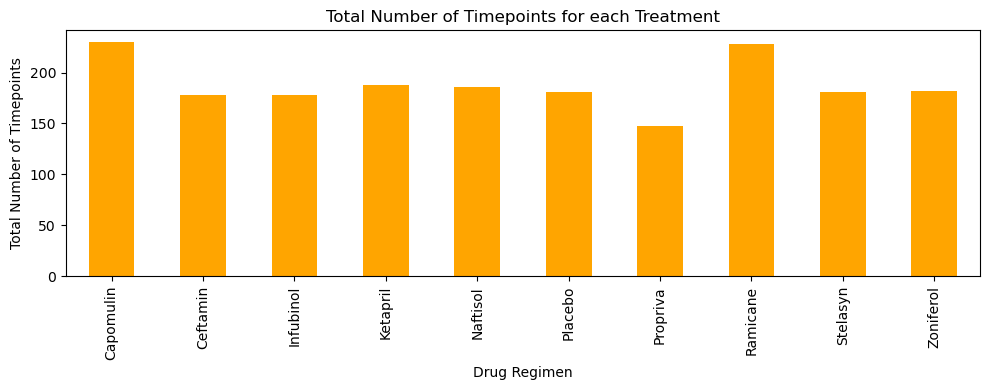

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
timepoint_plot = combined_data.groupby("Drug Regimen")["Timepoint"].count()
timepoint_plot

# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
timepoint_plot.plot(kind="bar", color = "orange", figsize=(10,4))

#set chart title
plt.title("Total Number of Timepoints for each Treatment")
plt.xlabel("Drug Regimen")
plt.ylabel("Total Number of Timepoints")

#show chart and set layout
plt.tight_layout()

#Display the bar graph
plt.show()

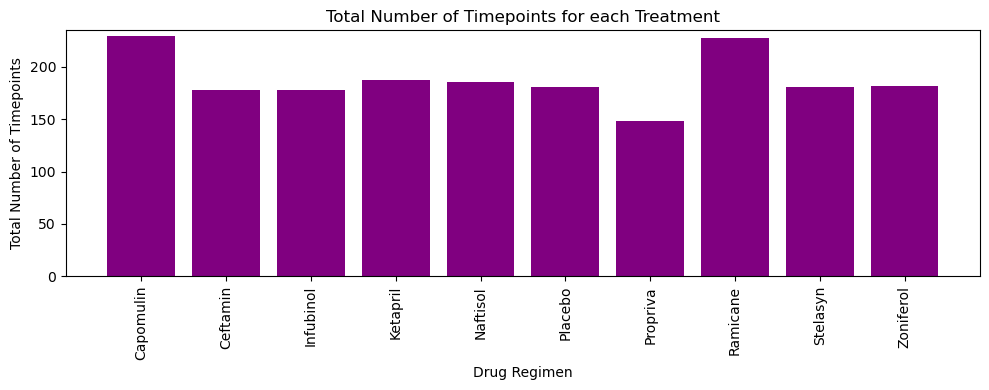

In [11]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

#Setup X and Y Axis
x_axis = np.arange(len(timepoint_plot))
tick_locations = [value for value in x_axis]
y_axis = timepoint_plot

#Set Figsize
plt.figure(figsize=(10,4))

#Plot the graph
plt.bar(x_axis, y_axis, color='purple', align='center')

# Setting the y_axis limit
plt.ylim(0, max(timepoint_plot)+5)

#Format Graph
plt.title("Total Number of Timepoints for each Treatment")
plt.xlabel("Drug Regimen")
plt.ylabel("Total Number of Timepoints")
plt.xticks(tick_locations, timepoint_plot.index.values, rotation="vertical")

#show chart and set layout
plt.tight_layout()

#Display the bar graph
plt.show()

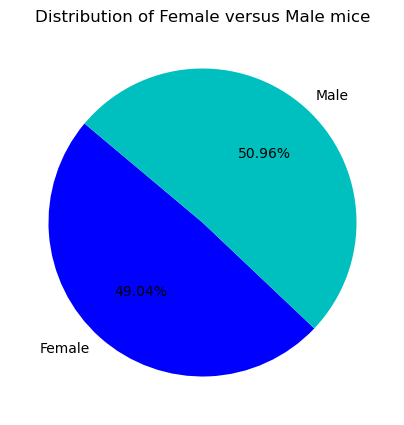

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_plot = combined_data.groupby("Sex")["Mouse ID"].count()
colours = ["blue", "c"]
gender_plot.plot(kind= "pie", figsize=(5, 5), colors=colours, autopct = "%1.2f%%", startangle=140,ylabel="", title = "Distribution of Female versus Male mice")
#Display Pie Chart
plt.show()

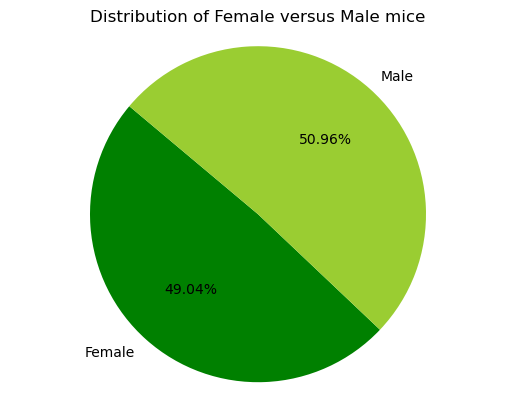

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

#Create labels, colours and y-axis reference varaiables
labels = gender_plot.index.values
x_axis = gender_plot
colours = ["green","yellowgreen"]

#Create a pie chart based upon the above data
plt.pie(x_axis, labels=labels, colors=colours,autopct="%1.2f%%", startangle=140)
plt.title("Distribution of Female versus Male mice")
# Create axes which are equal so we have a perfect circle
plt.axis("equal")

#Display Pie Chart
plt.show()

## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
# Removing duplicates and displaying last entry. Using keep parameter, we have set "last". 
combined_data_last_entry = combined_data.groupby("Mouse ID")["Timepoint"].max()
last_entry_df = pd.DataFrame({"Mouse ID": combined_data_last_entry.index,
                              "Timepoint": combined_data_last_entry.values})
#Print check of the dataframe
#last_entry_df

    
# Merge this group df with the original dataframe to get the tumour volume at the last timepoint
combined_lastentry_df = pd.merge(last_entry_df, combined_data, how = "left", on = ["Mouse ID","Timepoint"])

#Print check of the dataframe
#combined_lastentry_df


# Create a list of the Durgs we are analysing
drugs_selected = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
#Filter "Drug Regimen" for only these selected drugs
combined_data_refined = combined_lastentry_df[combined_lastentry_df['Drug Regimen'].isin(drugs_selected)]
combined_data_refined

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumour Volume (mm3),Metastatic Sites,Duplicated Mouse ID & Timepoint
0,a203,45,Infubinol,Female,20,23,67.973419,2,False
1,a251,45,Infubinol,Female,21,25,65.525743,1,False
3,a275,45,Ceftamin,Female,20,28,62.999356,3,False
6,a411,45,Ramicane,Male,3,22,38.407618,1,False
7,a444,45,Ramicane,Female,10,25,43.047543,0,False
...,...,...,...,...,...,...,...,...,...
238,y769,45,Ceftamin,Female,6,27,68.594745,4,False
239,y793,45,Capomulin,Male,17,17,31.896238,2,False
240,y865,45,Ceftamin,Male,23,26,64.729837,3,False
244,z578,45,Ramicane,Male,11,16,30.638696,0,False


In [15]:
# Put treatments into a list for for loop (and later for plot labels)
drugs = drugs_selected

# Create empty list to fill with tumour vol data (for plotting)
tumour_volume = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in drugs:
    volume = combined_data_refined.loc[combined_data_refined["Drug Regimen"]==drug, "Tumour Volume (mm3)"]
    tumour_volume.append(volume)

    # Determine outliers using upper and lower bounds
    quartiles = volume.quantile([.25, .5, .75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    
    print(f"The lower quartile of {drug} is: {lowerq}")
    print(f"The upper quartile of {drug} is: {upperq}")
    print(f"The interquartile range of occupancy is: {iqr}")
    print(f"The the median of occupancy is: {quartiles[0.5]}")
    
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"Values below {lower_bound} could be outliers.")
    print(f"Values above {upper_bound} could be outliers.")
    
    # Determine outliers using upper and lower bounds
    outliers = ((combined_data_refined["Drug Regimen"] == drug) & 
    ((combined_data_refined["Tumour Volume (mm3)"] < lower_bound) |
    (combined_data_refined["Tumour Volume (mm3)"] > upper_bound)))
    total_outliers_count = outliers.sum()
    print(f"There appear to be {total_outliers_count} outliers for this {drug} Regimen.")

The lower quartile of Capomulin is: 32.37735684
The upper quartile of Capomulin is: 40.1592203
The interquartile range of occupancy is: 7.781863460000004
The the median of occupancy is: 38.1251644
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.
There appear to be 0 outliers for this Capomulin Regimen.
The lower quartile of Ramicane is: 31.56046955
The upper quartile of Ramicane is: 40.65900627
The interquartile range of occupancy is: 9.098536719999998
The the median of occupancy is: 36.56165229
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.
There appear to be 0 outliers for this Ramicane Regimen.
The lower quartile of Infubinol is: 54.04860769
The upper quartile of Infubinol is: 65.52574285
The interquartile range of occupancy is: 11.477135160000003
The the median of occupancy is: 60.16518046
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.
Th

<function matplotlib.pyplot.show(close=None, block=None)>

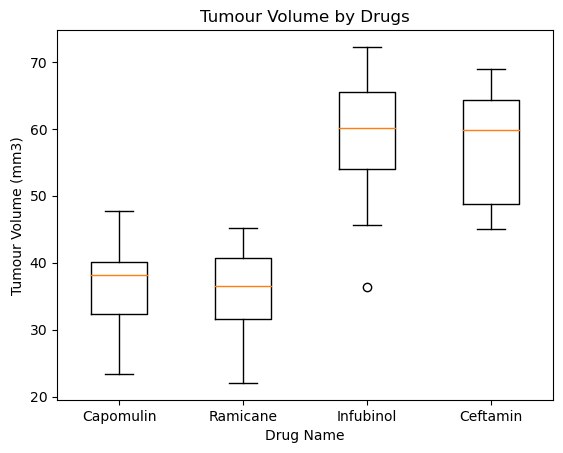

In [16]:
# Generate a box plot of the final tumour volume of each mouse across four regimens of interest
plt.boxplot(tumour_volume)
plt.xticks(np.arange(1,5), drugs)
plt.xlabel("Drug Name")
plt.ylabel("Tumour Volume (mm3)")
plt.title("Tumour Volume by Drugs")
plt.show


## Line and Scatter Plots

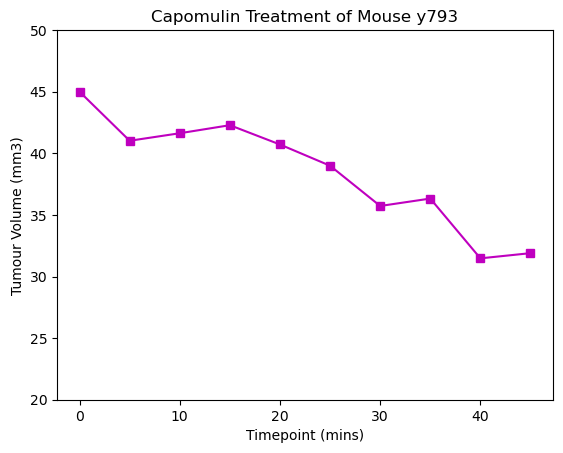

In [17]:
# Generate a line plot of tumour volume vs. time point for a mouse treated with Capomulin
Capomulin_Mouse_y793_df = combined_data.loc[combined_data["Mouse ID"] == "y793"]
Capomulin_Mouse_y793_df

#Setup x and y axis
x_axis = Capomulin_Mouse_y793_df["Timepoint"]
y_axis = Capomulin_Mouse_y793_df["Tumour Volume (mm3)"]
plt.plot(x_axis, y_axis, color = "m", marker = 's')
plt.title("Capomulin Treatment of Mouse y793")
plt.xlabel("Timepoint (mins)")
plt.ylabel("Tumour Volume (mm3)")
plt.ylim(20,50)
plt.show()


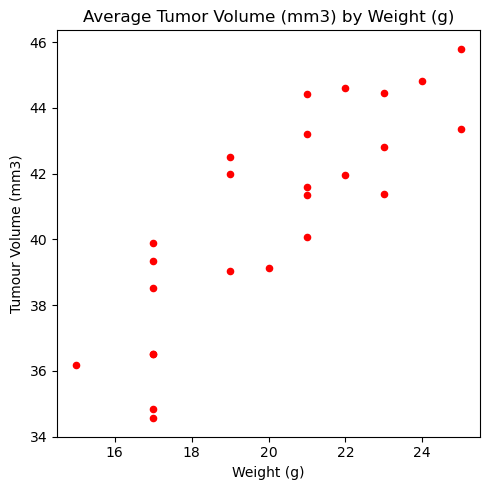

In [20]:
# Generate a scatter plot of average tumour volume vs. mouse weight for the Capomulin regimen
Capomulin_df = combined_data.loc[combined_data["Drug Regimen"] == "Capomulin"]

# Find average tumor volume for each mouse
Capomulin_Avg_Tumour_df = pd.DataFrame(Capomulin_df.groupby('Mouse ID')['Tumour Volume (mm3)'].mean().sort_values())
    #Print check dataframe
    #Capomulin_Avg_Tumour_df

#Create a dataframe of the Mouse ID and the mouse weight
Capomulin_Weight_df = pd.DataFrame(Capomulin_df.groupby('Mouse ID')["Weight (g)"].unique())
    #Print check dataframe
    #Capomulin_Weight_df

#Merge average tumor volume onto data_df and drop duplicates
avg_vol_weight_df = pd.merge(Capomulin_Avg_Tumour_df, Capomulin_Weight_df, on='Mouse ID')
avg_vol_weight_df["Weight (g)"] = avg_vol_weight_df["Weight (g)"].astype('int64')
    #Print check dataframe
    #avg_vol_weight_df

#Plot the dataframe as a scatter plot
avg_vol_weight_df.plot(kind ="scatter",x="Weight (g)", y = "Tumour Volume (mm3)", color = "r", 
                       figsize = (5,5), title = "Average Tumor Volume (mm3) by Weight (g)")
plt.tight_layout()
plt.show()  

## Correlation and Regression

The correlation between weight (g) and average tumor volume (mm3) on the Capomulin regimen is 0.84.
-------------------------------------------------------------------------------


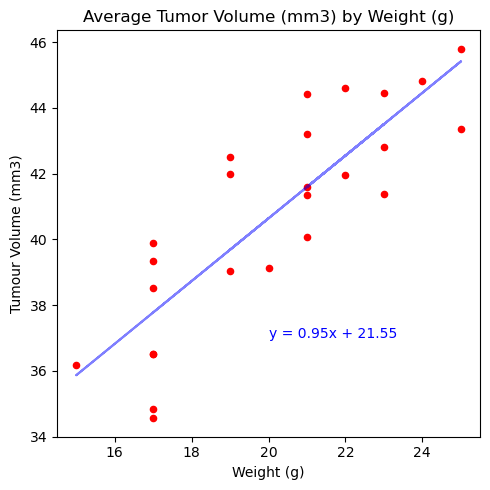

In [22]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumour volume for the Capomulin regimen
x_value = avg_vol_weight_df["Weight (g)"]
y_value = avg_vol_weight_df["Tumour Volume (mm3)"]


#Calculate the correlation coefficient between mouse weight and the avearge tumor volume
correlation_cefficient = avg_vol_weight_df["Weight (g)"].corr(avg_vol_weight_df['Tumour Volume (mm3)'])
# Print the answer to above calculation of the correlation coefficient
print(f"The correlation between weight (g) and average tumor volume (mm3) on the Capomulin regimen is {round(correlation_cefficient,2)}.")
print("-------------------------------------------------------------------------------")

# Calculate linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
regress_values = x_value * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot linear regression on top of scatter plot (scatter plot can be copied from code above)
avg_vol_weight_df.plot(kind ="scatter",x="Weight (g)", y = "Tumour Volume (mm3)", color = "r", 
                       figsize = (5,5), title = "Average Tumor Volume (mm3) by Weight (g)")
plt.plot(x_value,regress_values, color = 'b', alpha = 0.5)

# Annotate linear regression
plt.annotate(line_eq,(20,37),fontsize=10,color="blue")
plt.tight_layout()
plt.show()